**Boston House Price Predictor** 

In [326]:
import pandas as pd

In [327]:
housing = pd.read_csv("data.csv")

In [328]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [329]:
housing.shape

(506, 14)

In [330]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [331]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [332]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [333]:
housing["TAX"].value_counts()

666    132
307     40
403     30
437     15
304     14
      ... 
280      1
313      1
351      1
422      1
285      1
Name: TAX, Length: 66, dtype: int64

In [334]:
housing["TAX"].unique()

array([296, 242, 222, 311, 307, 279, 252, 233, 243, 469, 226, 313, 256,
       284, 216, 337, 345, 305, 398, 281, 247, 270, 276, 384, 432, 188,
       437, 403, 193, 265, 255, 329, 402, 348, 224, 277, 300, 330, 315,
       244, 264, 223, 254, 198, 285, 241, 293, 245, 289, 358, 304, 287,
       430, 422, 370, 352, 351, 280, 335, 411, 187, 334, 666, 711, 391,
       273])

In [335]:
housing["RAD"].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

**For Plotting Histograms**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3105abe80>,
      dtype=object)

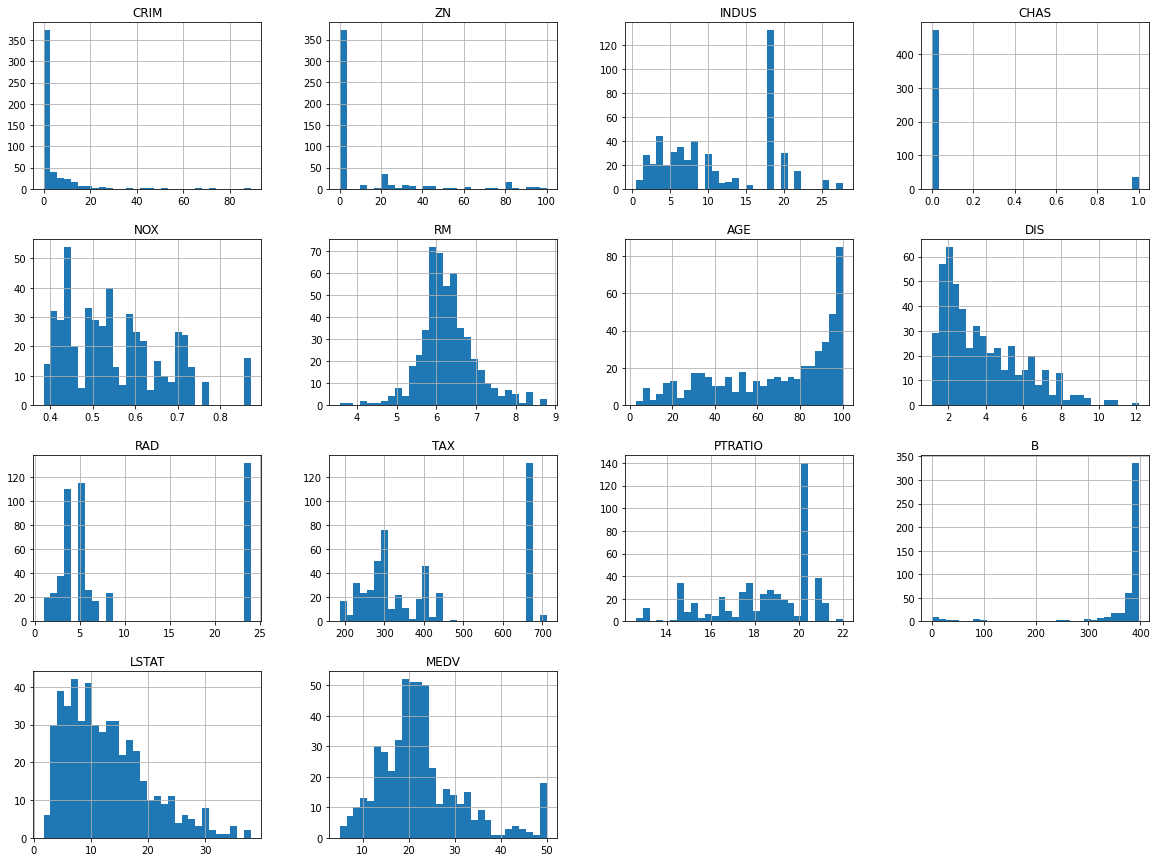

In [336]:
import matplotlib.pyplot as plt
housing.hist(bins = 30, figsize = (20,15))

**Train-Test Splitting**

In [337]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)

In [338]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [339]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [340]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [341]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [342]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [343]:
# 95/7

In [344]:
# 376/28

In [345]:
housing = strat_train_set

In [346]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


**Looking for Correlations**

In [347]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb30fb4bf60>,
      dtype=object)

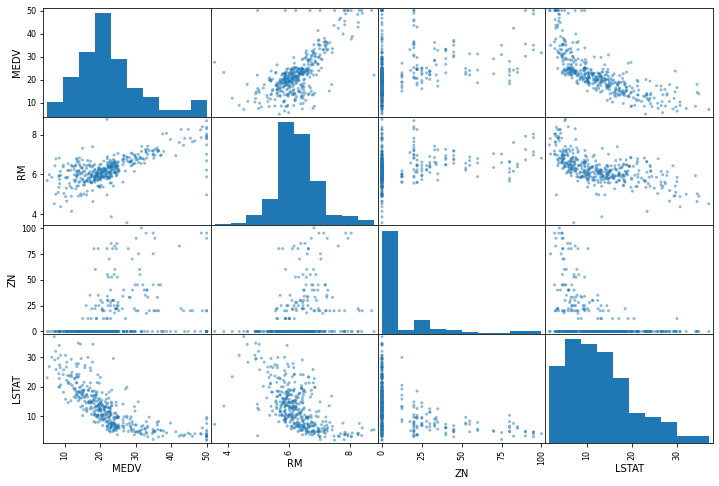

In [348]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8), alpha=0.5)

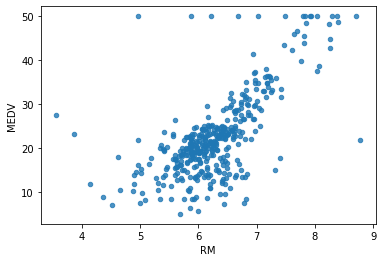

In [349]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

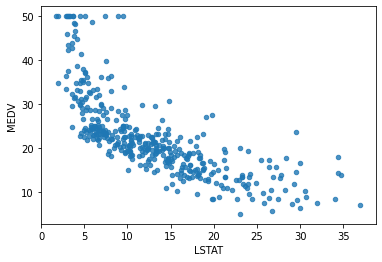

In [350]:
housing.plot(kind="scatter", x="LSTAT", y="MEDV", alpha=0.8)

**Splitting the train_set into features and labels**

In [351]:
housing = strat_train_set.drop("MEDV", axis=1) #features
housing_labels = strat_train_set["MEDV"].copy() #labels

**To fill the missing attributes by its median** 

In [352]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [353]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [354]:
X = imputer.transform(housing)

In [355]:
X

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [356]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

**Creating a Pipeline**

In [357]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [358]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [359]:
housing_num_tr.shape

(404, 13)

**Selecting a desired model for Boston House Price Prediction**

In [360]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [361]:
some_data = housing.iloc[:5]

In [362]:
some_labels = housing_labels.iloc[:5]

In [363]:
prepared_data = my_pipeline.transform(some_data)

In [364]:
model.predict(prepared_data)

array([22.218, 25.631, 16.57 , 23.387, 23.649])

In [365]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

**Evaluating the model**

In [366]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [367]:
rmse

1.251828209594524

**Using better evaluation technique - Cross Validation**

In [368]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [369]:
rmse_scores

array([2.90552098, 2.89545237, 4.50321313, 2.6602514 , 3.50916678,
       2.68634661, 4.44480823, 3.41369708, 3.16591219, 3.1829584 ])

In [370]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

**Scores for LinearRegression Model**

Scores: [4.22235612 4.26438649 5.09424333 3.83081183 5.37600331 4.41092152
 7.47272243 5.48554135 4.14606627 6.0717752 ]

Mean:  5.037482786117751

Standard deviation:  1.0594382405606957




In [371]:
# print_scores(rmse_scores)

**Scores for DecisionTreeRegressor Model**

Scores: [4.06610019 4.45667491 5.06612374 3.69112317 3.98465808 2.98709725
 5.22907736 3.97652486 3.28100594 4.69342625]

Mean:  4.143181175207883

Standard deviation:  0.6910223907551595


In [ ]:
print_scores(rmse_scores)

**Scores for RandomForestRegressor Model**

Scores: [2.90552098 2.89545237 4.50321313 2.6602514  3.50916678 2.68634661
 4.44480823 3.41369708 3.16591219 3.1829584 ]

Mean:  3.3367327164957556

Standard deviation:  0.6275581324805367

**Therefore we choose RandomForestRegressor Model for our Boston House Price Prediction since it has least root mean squared error(rmse)**

**Saving our model**

In [377]:
from joblib import dump, load
dump(model, 'Boston.joblib') 

['Boston.joblib']

**Next step: Testing the model on test data**

In [373]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [374]:
final_rmse

2.910757254412954

In [ ]:
print(final_predictions, list(Y_test))

**Using the model**

In [378]:
from joblib import dump, load
import numpy as np
model = load('Boston.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.63])